In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('data/spx_weeklies.csv')

In [3]:
print(data.columns)

Index(['secid', 'date', 'symbol', 'symbol_flag', 'exdate', 'last_date',
       'cp_flag', 'strike_price', 'best_bid', 'best_offer', 'volume',
       'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta',
       'optionid', 'cfadj', 'am_settlement', 'contract_size', 'ss_flag',
       'forward_price', 'expiry_indicator', 'root', 'suffix', 'index_flag',
       'issuer', 'exercise_style'],
      dtype='object')


In [4]:
drop = []
for i in data.columns:
    print(i)
    print(data[i].unique())

    if len(data[i].unique()) == 1:
        drop.append(i)


secid
[108105]
date
['03/01/2012' '04/01/2012' '05/01/2012' ... '24/02/2023' '27/02/2023'
 '28/02/2023']
symbol
['SPXW 120106C1000000' 'SPXW 120106C1025000' 'SPXW 120106C1050000' ...
 'SPXW 230307P5000000' 'SPXW 230307P5200000' 'SPXW 230307P5400000']
symbol_flag
[1]
exdate
['06/01/2012' '13/01/2012' '21/01/2012' ... '03/03/2023' '06/03/2023'
 '07/03/2023']
last_date
[nan '29/12/2011' '30/12/2011' ... '27/02/2023' '26/02/2023' '28/02/2023']
cp_flag
['C' 'P']
strike_price
[1000000 1025000 1050000 1075000 1100000 1125000 1130000 1135000 1140000
 1145000 1150000 1155000 1160000 1165000 1170000 1175000 1180000 1185000
 1190000 1195000 1200000 1205000 1210000 1215000 1220000 1225000 1230000
 1235000 1240000 1245000 1250000 1255000 1260000 1265000 1270000 1275000
 1280000 1285000 1290000 1295000 1300000 1305000 1310000 1315000 1320000
 1325000 1330000 1335000 1340000 1345000 1350000 1375000 1400000 1425000
 1005000 1010000 1015000 1020000 1030000 1035000 1040000 1045000 1055000
 1060000 10650

In [5]:
data = data.drop(columns=drop)

In [6]:
print(data.shape)
print(data.columns)

(3205352, 18)
Index(['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
       'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'am_settlement',
       'expiry_indicator'],
      dtype='object')


In [7]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['exdate'] = pd.to_datetime(data['exdate'], format='%d/%m/%Y')

data['maturity'] = np.busday_count(data['date'].values.astype('datetime64[D]'), data['exdate'].values.astype('datetime64[D]'))

In [18]:
print(data['maturity'].unique())

[3 2 1 0 5 4]


In [9]:
print(data['strike_price'].unique())
print(len(data['strike_price'].unique()))

[1000000 1025000 1050000 1075000 1100000 1125000 1130000 1135000 1140000
 1145000 1150000 1155000 1160000 1165000 1170000 1175000 1180000 1185000
 1190000 1195000 1200000 1205000 1210000 1215000 1220000 1225000 1230000
 1235000 1240000 1245000 1250000 1255000 1260000 1265000 1270000 1275000
 1280000 1285000 1290000 1295000 1300000 1305000 1310000 1315000 1320000
 1325000 1330000 1335000 1340000 1345000 1350000 1375000 1400000 1425000
 1005000 1010000 1015000 1020000 1030000 1035000 1040000 1045000 1055000
 1060000 1065000 1070000 1080000 1085000 1090000 1095000 1105000 1110000
 1115000 1120000 1355000 1360000 1365000 1370000 1380000 1385000 1390000
 1395000 1410000 1420000 1430000 1440000 1450000 1475000  150000 1500000
 1525000 1550000 1600000 1700000 1900000  200000  300000  350000  400000
  500000  550000  575000  600000  625000  650000  675000  680000  700000
  710000  720000  725000  730000  740000  750000  760000  770000  775000
  780000  785000  790000  795000  800000  805000  8

In [ ]:
# introduce moneyness instead of strike price
# Need stock price ( and 0 to 5 days ahead future price)
# or m = St / Kt (Almeida et al. )

m = ln(K/Fτ )√τIVatm,τ 

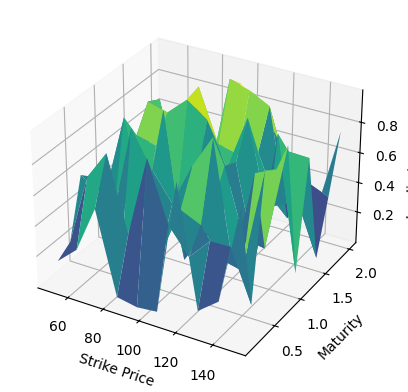

In [1]:

# Sample data for implied volatilities, strike prices, and maturities
strike_prices = np.linspace(50, 150, 10)
maturities = np.linspace(0.1, 2, 10)
implied_volatilities = np.random.rand(10, 10)  # Replace with your actual data

# Create a meshgrid
X, Y = np.meshgrid(strike_prices, maturities)
Z = implied_volatilities

# Plotting
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')

plt.show()
